In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [3]:
# Load dataset with explicit frequency
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
data.index.freq = 'MS'  # Set the frequency to month start


            Sunspots
Month               
1749-01-01      58.0
1749-02-01      62.6
1749-03-01      70.0
1749-04-01      55.7
1749-05-01      85.0


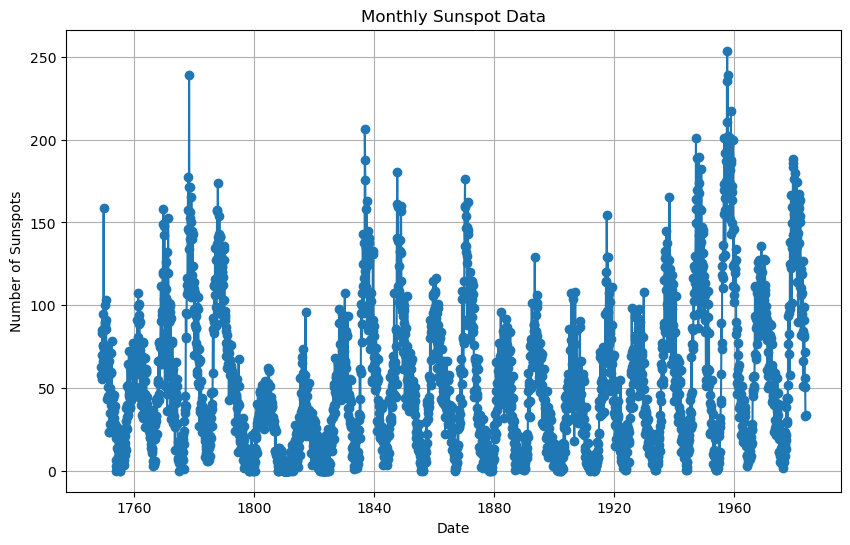

In [4]:
print(data.head())

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Sunspots'], marker='o', linestyle='-')
plt.title('Monthly Sunspot Data')
plt.xlabel('Date')
plt.ylabel('Number of Sunspots')
plt.grid(True)
plt.show()


In [5]:

# Fit ARIMA model
model = ARIMA(data['Sunspots'], order=(5, 1, 0))  # You may need to adjust the order parameters based on your data
result = model.fit()

In [6]:
# Summary of the ARIMA model
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:               Sunspots   No. Observations:                 2820
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -11780.322
Date:                Sat, 01 Jun 2024   AIC                          23572.644
Time:                        18:04:21   BIC                          23608.309
Sample:                    01-01-1749   HQIC                         23585.513
                         - 12-01-1983                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4085      0.014    -28.182      0.000      -0.437      -0.380
ar.L2         -0.2891      0.016    -18.195      0.000      -0.320      -0.258
ar.L3         -0.1923      0.016    -12.137      0.0

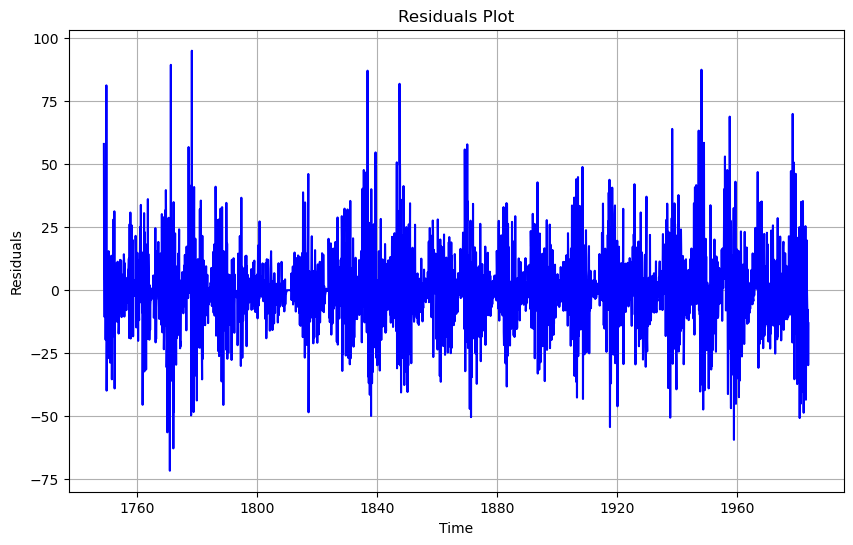

In [7]:
# Plotting the residuals
residuals = pd.DataFrame(result.resid)
plt.figure(figsize=(10, 6))
plt.plot(residuals, color='blue')
plt.title('Residuals Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [8]:
# Forecasting future values
forecast_steps = 10  # Number of steps to forecast into the future
forecast = result.forecast(steps=forecast_steps)

In [9]:
# Print the forecasted values
print("Forecasted values:")
print(forecast)

Forecasted values:
1984-01-01    41.425487
1984-02-01    43.056574
1984-03-01    41.921297
1984-04-01    41.555670
1984-05-01    40.942983
1984-06-01    40.934355
1984-07-01    41.207822
1984-08-01    41.311811
1984-09-01    41.270226
1984-10-01    41.237937
Freq: MS, Name: predicted_mean, dtype: float64
